In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [3]:
image_size = (32,32)
batch_size = 32
train_flow_path = '/Users/dmitry/Images/train' 
test_flow_path = '/Users/dmitry/Images/test'

In [4]:
data_gen_train = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
)

data_gen_test = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
)

train_images = data_gen_train.flow_from_directory(
    train_flow_path,
    target_size = image_size,
    batch_size = batch_size,
    color_mode = 'rgb',
    classes = ['A', 'B', 'D', 'E', 'G'],
    class_mode = 'categorical',
    shuffle = True,
    seed = 42
)

test_images = data_gen_test.flow_from_directory(
    test_flow_path,
    target_size = image_size,
    batch_size = batch_size,
    color_mode = 'rgb',
    classes = ['A','B', 'D', 'E', 'G'],
    class_mode = 'categorical',
    shuffle = True,
    seed = 42
)

Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten

In [6]:
model = Sequential()
model.add(Flatten(input_shape=[32,32,3]))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 15365     
Total params: 15,365
Trainable params: 15,365
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(train_images, epochs=50, validation_data = test_images)

/usr/local/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
32/32 [==============================] - 1s 41ms/step - loss: 466.3414 - accuracy: 0.1930 - val_loss: 161.6478 - val_accuracy: 0.2100
Epoch 2/50
32/32 [==============================] - 1s 27ms/step - loss: 137.0337 - accuracy: 0.2160 - val_loss: 122.3191 - val_accuracy: 0.2560
Epoch 3/50
32/32 [==============================] - 1s 37ms/step - loss: 87.6591 - accuracy: 0.2770 - val_loss: 157.2526 - val_accuracy: 0.2200
Epoch 4/50
32/32 [==============================] - 1s 19ms/step - loss: 94.8559 - accuracy: 0.3370 - val_loss: 91.1920 - val_accuracy: 0.2780
Epoch 5/50
32/32 [==============================] - 1s 19ms/step - loss: 50.8528 - accuracy: 0.4100 - val_loss: 79.0079 - val_accuracy: 0.2680
Epoch 6/50
32/32 [==============================] - 1s 19ms/step - loss: 58.7047 - accuracy: 0.3770 - val_loss: 69.8169 - val_accuracy: 0.2060
Epoch 7/50
32/32 [==============================] - 1s 19ms/step - loss: 47.0978 - accuracy: 0.4640 - val_loss: 84.2390 - val_accuracy: 0

In [8]:
scores = model.evaluate(test_images)
print(f'* Loss = {scores[0]}\n* Accuracy = {scores[1]}')

16/16 [==============================] - 0s 12ms/step - loss: 122.5573 - accuracy: 0.3520
* Loss = 122.55731201171875
* Accuracy = 0.35199999809265137


In [9]:
from keras.utils.vis_utils import plot_model

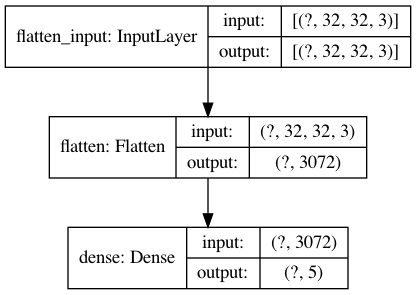

In [10]:
plot_model(model, to_file='./One_layer_model.png', show_shapes=True, show_layer_names=True)

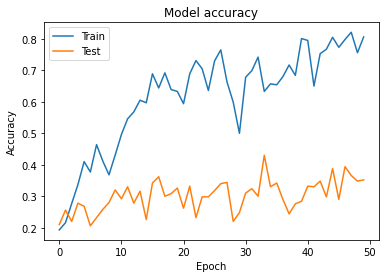

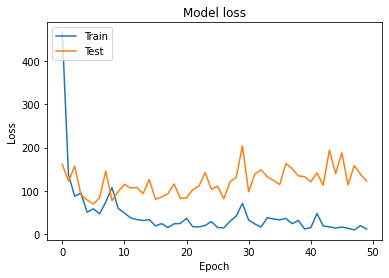

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('./One_layer_accurasy.png')
plt.show()
#
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('./One_layer_loss.png')
plt.show()